In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
# Now, we will load the data set and look at some initial rows and data types of the columns:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
#dateparse = lambda dates:datetime.strptime(dates, '%Y-%m')
dateparse = lambda dates:parse(dates)
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print ('\n Parsed Data:')
print (data.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

 Data Types:
Month         object
Passengers     int64
dtype: object

 Parsed Data:
            Passengers
Month                 
1949-01-25         112
1949-02-25         118
1949-03-25         132
1949-04-25         129
1949-05-25         121


In [2]:
data.head()

,Passengers
Month,
1949-01-23,112
1949-02-23,118
1949-03-23,132
1949-04-23,129
1949-05-23,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-23 to 1960-12-23
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


#### Handling time series data in Pandas few operations

In [4]:
pd.datetime.strptime('1949-01', '%Y-%m')

C:\Users\hP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(1949, 1, 1, 0, 0)

In [5]:
from dateutil.parser import parse

In [6]:
parse('1949-01')

datetime.datetime(1949, 1, 23, 0, 0)

In [7]:
data.index

DatetimeIndex(['1949-01-23', '1949-02-23', '1949-03-23', '1949-04-23',
               '1949-05-23', '1949-06-23', '1949-07-23', '1949-08-23',
               '1949-09-23', '1949-10-23',
               ...
               '1960-03-23', '1960-04-23', '1960-05-23', '1960-06-23',
               '1960-07-23', '1960-08-23', '1960-09-23', '1960-10-23',
               '1960-11-23', '1960-12-23'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
data.loc['1949-01-23']

Passengers    112
Name: 1949-01-23 00:00:00, dtype: int64

In [9]:
data['Passengers']

Month
1949-01-23    112
1949-02-23    118
1949-03-23    132
1949-04-23    129
1949-05-23    121
             ... 
1960-08-23    606
1960-09-23    508
1960-10-23    461
1960-11-23    390
1960-12-23    432
Name: Passengers, Length: 144, dtype: int64

In [10]:
data.loc['1949-01-10':'1949-05-10']

,Passengers
Month,
1949-01-23,112
1949-02-23,118
1949-03-23,132
1949-04-23,129


#### Check Stationarity of a Time Series
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can state that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

* constant mean
* constant variance
* an autocovariance that does not depend on time

<AxesSubplot:xlabel='Month'>

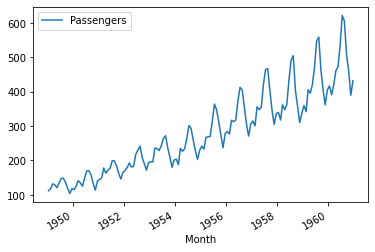

In [11]:
data.plot() # plotting with pandas

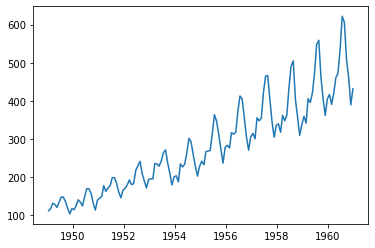

In [12]:
plt.plot(data)

##### Plotting Rolling Statistics:
We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

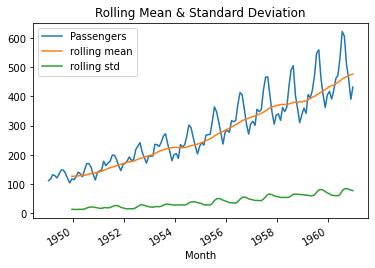

In [13]:
data.Passengers.plot()
data.Passengers.rolling(12).mean().plot(label='rolling mean')
data.Passengers.rolling(12).std().plot(label='rolling std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')

In [14]:
data.Passengers.rolling(12).mean()

Month
1949-01-23           NaN
1949-02-23           NaN
1949-03-23           NaN
1949-04-23           NaN
1949-05-23           NaN
                 ...    
1960-08-23    463.333333
1960-09-23    467.083333
1960-10-23    471.583333
1960-11-23    473.916667
1960-12-23    476.166667
Name: Passengers, Length: 144, dtype: float64

##### Perform Dickey-Fuller test:
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.


In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
data_series=(data.values).ravel() # in full

In [17]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

Next, we’ll discuss the techniques that can be used to take this TS towards stationarity.

#### How to make a Time Series Stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationarity of a TS:
*  Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
*  Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.
###### STEPS
* Step:1> The underlying principle is to model or estimate the trend and seasonality in the data and remove those from the data to get a stationary series. 
* Step:2> Statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

Note: Here we will be discussing a number of methods. Some might work well in this case and others might not. But the idea is to get a hang of all the methods and not focus on just the problem at hand.

Working on the trend part:

##### Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

<AxesSubplot:xlabel='Month'>

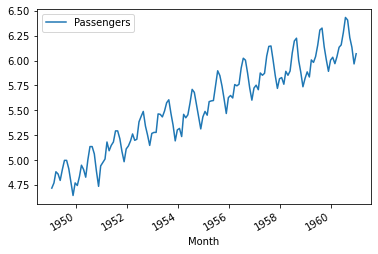

In [18]:
## Log transformation
data_log = np.log(data)
data_log.plot()

It is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the data. Most commonly used techniques are:

  1. Aggregation – taking average for a time period like monthly/weekly averages
  2. Smoothing – taking rolling averages
  3. Polynomial Fitting – fit a regression model
We will use smoothing here and you should try other techniques as well which might work out for other problems. Smoothing refers to taking rolling estimates, i.e. considering the past few instances. There are can be various ways,  two are discussed here.

#### Moving average

Text(0.5, 1.0, 'Rolling Mean after log tranformation')

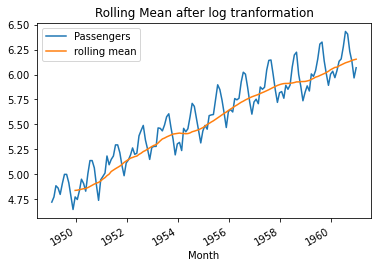

In [19]:
data_log.Passengers.plot()
data_log.Passengers.rolling(12).mean().plot(label='rolling mean')
plt.legend()
plt.title('Rolling Mean after log tranformation')

Subtracting  the rolling mean  from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values.

In [20]:
ra=data_log.Passengers.rolling(12).mean()
data_diff = data_log.Passengers- ra
data_diff.dropna(inplace=True)

In [21]:
data_diff

Month
1949-12-23   -0.065494
1950-01-23   -0.093449
1950-02-23   -0.007566
1950-03-23    0.099416
1950-04-23    0.052142
                ...   
1960-08-23    0.282363
1960-09-23    0.098235
1960-10-23   -0.009230
1960-11-23   -0.182690
1960-12-23   -0.085789
Name: Passengers, Length: 133, dtype: float64

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

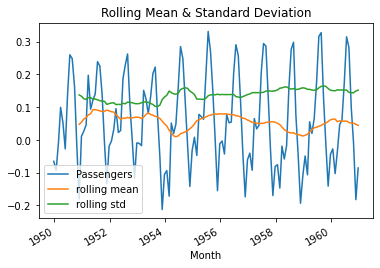

In [22]:
data_diff.plot()
data_diff.rolling(12).mean().plot(label='rolling mean')
data_diff.rolling(12).std().plot(label='rolling std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')

In [23]:
### Again checking Dickey-Fuller Test
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

##### Exponentially Weighted Moving Average 
 In above approach time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.This can be implemented in Pandas as:

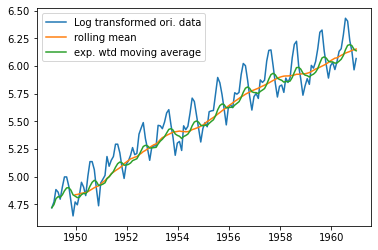

In [24]:
ewa = data_log.ewm(span=12).mean()
plt.plot(data_log,label='Log transformed ori. data')
plt.plot(data_log.rolling(12).mean(),label='rolling mean')
plt.plot(ewa,label='exp. wtd moving average')
plt.legend()

In [25]:
data_diff1 = data_log- ewa

In [26]:
data_diff1

,Passengers
Month,
1949-01-23,0.000000
1949-02-23,0.023918
1949-03-23,0.082941
1949-04-23,0.041027
1949-05-23,-0.016747
...,...
1960-08-23,0.219317
1960-09-23,0.036316
1960-10-23,-0.051419


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

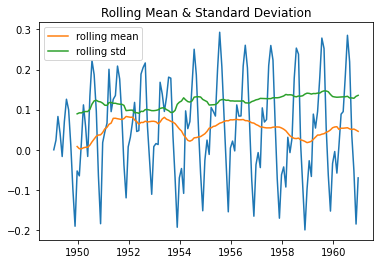

In [27]:
plt.plot(data_diff1)
plt.plot(data_diff1.rolling(12).mean(),label='rolling mean')
plt.plot(data_diff1.rolling(12).std(),label='rolling std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')

In [28]:
data_diff1.Passengers ## convverting data into series

Month
1949-01-23    0.000000
1949-02-23    0.023918
1949-03-23    0.082941
1949-04-23    0.041027
1949-05-23   -0.016747
                ...   
1960-08-23    0.219317
1960-09-23    0.036316
1960-10-23   -0.051419
1960-11-23   -0.185029
1960-12-23   -0.070019
Name: Passengers, Length: 144, dtype: float64

In [29]:
## Again checking Dickey-Fuller test
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_diff1.Passengers, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


###### Eliminating Trend and Seasonality
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

* Differencing – taking the differece with a particular time lag
* Decomposition – modeling both trend and seasonality and removing them from the model.

Differencing :>In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing :difference(t) = observation(t) - observation(t-1), can be done in Pandas as given below >

In [30]:
# create a differenced series # input data must be in seris 
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

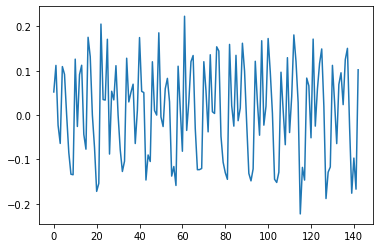

In [31]:
plt.plot(difference(data_log.values))

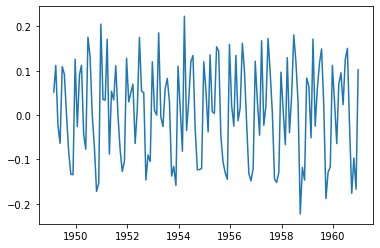

In [32]:
data_log_diff = data_log.diff() # Default period is taken 1
plt.plot(data_log_diff)
plt.show()

In [33]:
data_log_diff.dropna(inplace=True)

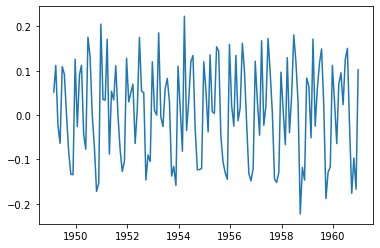

In [34]:
ts_log_diff = data_log - data_log.shift(1)
plt.plot(ts_log_diff)

In [35]:
## Again plot rolling mean and rolling std and chec Dickey fuller test

##### Breaking a time series: 
* Systematic: Components of the time series that have consistency or recurrence and can be described and modeled are viz.evel, trend, seasonality.
* Non-Systematic: Components of the time series that cannot be directly modeled is noise

These components are defined as follows:

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.
>So a time series is thought to be an aggregate or combination of these four components.
>All series have a level and noise. The trend and seasonality components are optional.
>It is helpful to think of the components as combining either additively or multiplicatively as given by relation below:
* y(t) = Level + Trend + Seasonality + Noise
* y(t) = Level * Trend * Seasonality * Noise

C:\Users\hP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


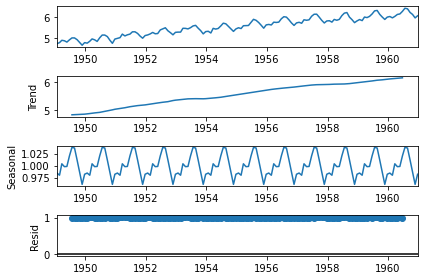

In [36]:
#Multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_log, model='multiplicative',freq=12)
result.plot()
plt.show()

In [37]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid
residual.dropna(inplace=True)

In [38]:
residual

Month
1949-07-23    0.995128
1949-08-23    0.995512
1949-09-23    1.001813
1949-10-23    0.998901
1949-11-23    0.995896
                ...   
1960-02-23    0.995180
1960-03-23    0.981534
1960-04-23    1.001569
1960-05-23    1.003601
1960-06-23    1.000834
Name: resid, Length: 132, dtype: float64

###### Again check rolling mean and std and Dickey fuller test:
You will find that test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

All above are the techniques for making time series data stationary

* A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as noise. But this is very rare.
* A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
##### ARIMA
>ARIMA: Auto-Regressive Integrated Moving Averages
>The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

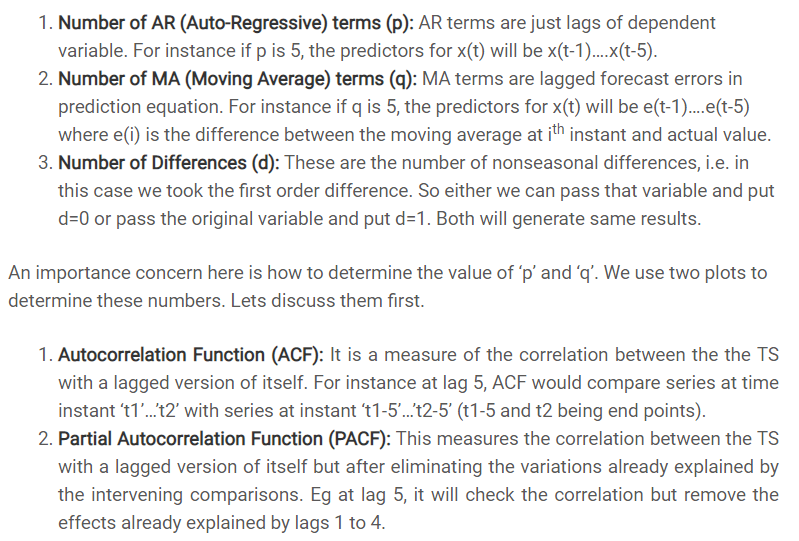

###### WE will work on differenced data :> data_log_diff
Differencing is a popular technique and relatively easier to add noise and seasonality back into predicted residuals in this case. 

In [39]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [40]:
lag_acf = acf(data_log_diff, nlags=12)
lag_pacf = pacf(data_log_diff, nlags=12)

C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


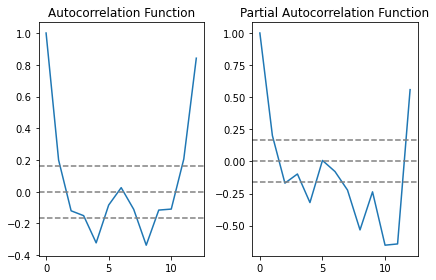

In [41]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:
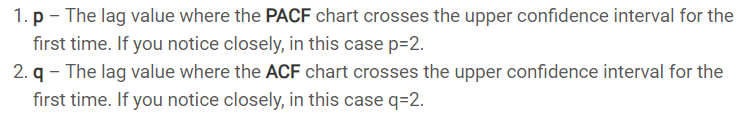    

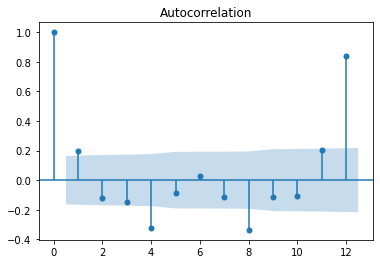

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_log_diff, lags=12)
plt.show()

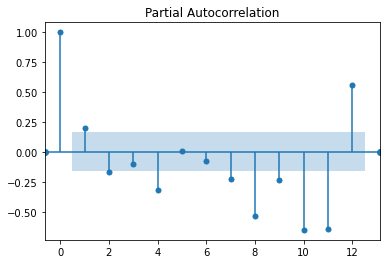

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_log_diff, lags=12,use_vlines=True, marker='o')
plt.show()

In [44]:
from statsmodels.tsa.arima_model import ARIMA
#The p,d,q values can be specified using the 
#order argument of ARIMA which take a tuple (p,d,q).
#Let model the 3 cases:

In [45]:
data_log_diff.Passengers

Month
1949-02-23    0.052186
1949-03-23    0.112117
1949-04-23   -0.022990
1949-05-23   -0.064022
1949-06-23    0.109484
                ...   
1960-08-23   -0.026060
1960-09-23   -0.176399
1960-10-23   -0.097083
1960-11-23   -0.167251
1960-12-23    0.102279
Name: Passengers, Length: 143, dtype: float64

C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

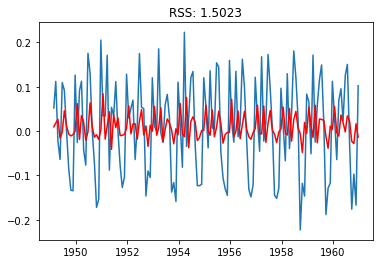

In [46]:
## AR Model
model = ARIMA(data_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)
predict1=results_AR.fittedvalues
plt.plot(data_log_diff)
plt.plot(predict1, color='red')
plt.title('RSS: %.4f'% sum((predict1-(data_log_diff.Passengers))**2))

C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

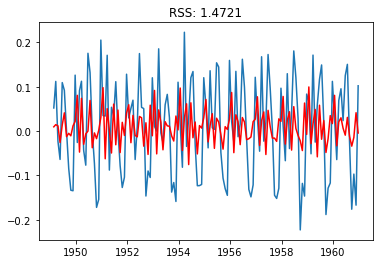

In [47]:
## MA Model
model = ARIMA(data_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)
predict2=results_MA.fittedvalues
plt.plot(data_log_diff)
plt.plot(predict2, color='red')
plt.title('RSS: %.4f'% sum((predict2-(data_log_diff.Passengers))**2))

C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\hP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

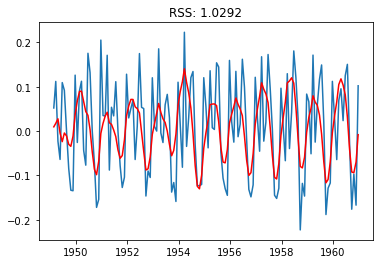

In [48]:
## Combined Model
model = ARIMA(data_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
predict3=results_ARIMA.fittedvalues ## one oder differnced values
### Thus comparing with differenced data 'data_log_diff'
plt.plot(data_log_diff)
plt.plot(predict3, color='red')
plt.title('RSS: %.4f'% sum((predict3-(data_log_diff.Passengers))**2))

### Converting Back the data into original scale:

In [49]:
predictions_ARIMA_diff = predict3.copy()
predictions_ARIMA_diff

Month
1949-02-23    0.009580
1949-03-23    0.017491
1949-04-23    0.027670
1949-05-23   -0.004521
1949-06-23   -0.023890
                ...   
1960-08-23   -0.041176
1960-09-23   -0.092350
1960-10-23   -0.094013
1960-11-23   -0.069924
1960-12-23   -0.008127
Length: 143, dtype: float64

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-23    0.009580
1949-03-23    0.027071
1949-04-23    0.054742
1949-05-23    0.050221
1949-06-23    0.026331
                ...   
1960-08-23    1.372554
1960-09-23    1.280204
1960-10-23    1.186191
1960-11-23    1.116267
1960-12-23    1.108140
Length: 143, dtype: float64

#### Adding first value of modeled data (i.e. data_log)  to each value of 'predicitons_ARIMA_diff_cumsum'

In [51]:
data_log

,Passengers
Month,
1949-01-23,4.718499
1949-02-23,4.770685
1949-03-23,4.882802
1949-04-23,4.859812
1949-05-23,4.795791
...,...
1960-08-23,6.406880
1960-09-23,6.230481
1960-10-23,6.133398


In [52]:
a=np.ones(len(data_log))*data_log.values[0][0]
p_first_value =pd.Series(a,index=data_log.index)
# finally
predictions_ARIMA_log=p_first_value.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Month
1949-01-23    4.718499
1949-02-23    4.728079
1949-03-23    4.745570
1949-04-23    4.773241
1949-05-23    4.768720
                ...   
1960-08-23    6.091053
1960-09-23    5.998703
1960-10-23    5.904690
1960-11-23    5.834766
1960-12-23    5.826639
Length: 144, dtype: float64

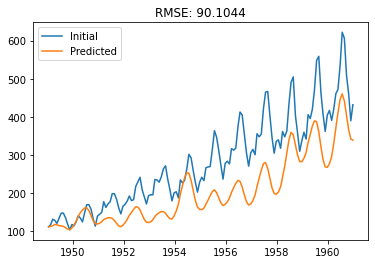

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data,label='Initial')
plt.plot(predictions_ARIMA, label='Predicted')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data.Passengers)**2)/len(data)))
plt.legend()

### Forcasting for future one time step ahead

In [61]:
# data_log has index but it is monthly data we should convert it to DatetimeIndex and pass a frequency by to_period:
data_log.index = pd.DatetimeIndex(data_log.index).to_period('M')
model1 = ARIMA(data_log, order=(2, 1, 2))  
model_fit1 = model.fit()  
output1=model_fit1.forecast() ## one time step ahead by default, we can pass number of time step in future we want to predict 
output1[0]
## Note forecast gives data in same scale as that of input data and we dont have to
## integrate it by applying cumsum and addition of first value

array([6.09553396])

In [57]:
one_step_head=np.exp(output1[0]) ## conveting back to its original scale by taking exponential
one_step_head

array([443.87098999])

In [58]:
# The given last value in the data set
data.iloc[-1] 

Passengers    432
Name: 1960-12-23 00:00:00, dtype: int64

#### 'one_step_ahead' is predicted value of passenger at one timestamp ahead of 1960-12-23 i.e. of 1961-1-23.